In [1]:
import random
from bitstring import BitArray
import math
from qiskit import *
import numpy as np
from math import *
from qiskit.extensions import *
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_histogram
from numpy.random import randint
import pandas as pd
from fractions import Fraction
from qiskit.circuit.library import QFT

In [2]:
#SHARED KEYS
def gen_key():
    key = random.randbytes(random.randint(1, 2048))
    key_bits = BitArray(key).bin
    fingerprint = math.log(int(key_bits, 2), 2)
    return fingerprint

In [3]:
def referee_shared_key():
    shared_key = gen_key()
    key_Alice = shared_key
    key_Bob = shared_key
    return key_Alice, key_Bob


In [4]:
def referee_dif_key():
    key_Alice = gen_key()
    key_Bob = gen_key()
    return key_Alice, key_Bob


Shared key:

Alice's key: 8053.588273777581 
Bob's key: 8053.588273777581 

      ┌───┐   ┌───┐┌─┐
q0_0: ┤ H ├─■─┤ H ├┤M├
      └───┘ │ └───┘└╥┘
q0_1: ──────X───────╫─
            │       ║ 
q0_2: ──────X───────╫─
                    ║ 
c0: 2/══════════════╩═
                    0 
Statevector([1.-6.123234e-17j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j, 0.+0.000000e+00j, 0.+0.000000e+00j,
             0.+0.000000e+00j, 0.+0.000000e+00j],
            dims=(2, 2, 2))


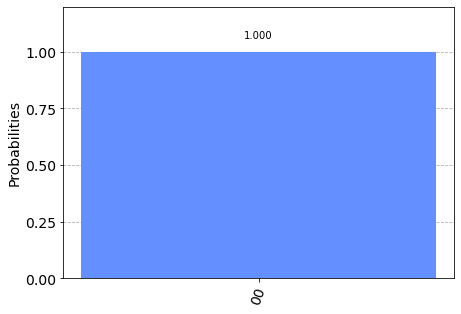

In [5]:
print("Shared key:")
Alice,Bob=referee_shared_key()
print("\nAlice's key:", Alice, "\nBob's key:", Bob, "\n")
q = QuantumRegister(3)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)

circuit.h(q[0])

#circuit.x(q[2])
circuit.cswap(q[0], q[1], q[2])
circuit.h(q[0])

circuit.measure(q[0], c[0])



#circuit.measure(q[0], c[0])
print(circuit.draw())

vector_sim = Aer.get_backend('statevector_simulator')
job = execute(circuit, vector_sim)
state = job.result().get_statevector()
print(state)


circuit.measure(q[0], c[0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1000000).result()
plot_histogram(result.get_counts(circuit)) 

## What happens if someone try's a random key (like in a brute-force attack)?

Case the keys not match:

Alice's key: 11735.827554672882 
Bob's key: 3710.9247817474825 

       ┌───┐   ┌───┐┌─┐
q17_0: ┤ H ├─■─┤ H ├┤M├
       └───┘ │ └───┘└╥┘
q17_1: ──────X───────╫─
       ┌───┐ │       ║ 
q17_2: ┤ X ├─X───────╫─
       └───┘         ║ 
 c1: 2/══════════════╩═
                     0 
Statevector([ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.70710678-8.65956056e-17j, -0.        +0.00000000e+00j,
              0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2))


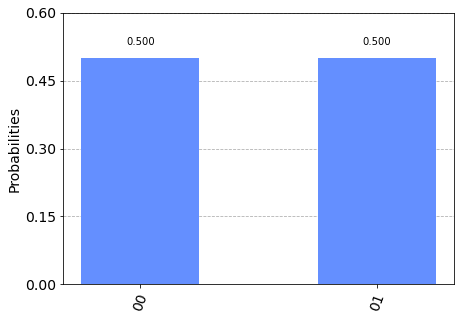

In [6]:
print("Case the keys not match:")
Alice,Bob=referee_dif_key()
print("\nAlice's key:", Alice, "\nBob's key:", Bob, "\n")
b = False
q = QuantumRegister(3)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)

circuit.h(q[0])
if b == False:
    circuit.x(q[2])
circuit.cswap(q[0], q[1], q[2])
circuit.h(q[0])

circuit.measure(q[0], c[0])

print(circuit.draw())

vector_sim = Aer.get_backend('statevector_simulator')
job = execute(circuit, vector_sim)
state = job.result().get_statevector()
print(state)


circuit.measure(q[0], c[0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1000000).result()
plot_histogram(result.get_counts(circuit))      #depending on the inputs, if input 1 and input 2 are the same, the output will be 0 with 100% probability. If the inputs differ, the outputs will differ too


#PROBLEM: Some error probability

# Entangled keys using Bell-States

       ┌───┐     
q38_0: ┤ H ├──■──
       └───┘┌─┴─┐
q38_1: ─────┤ X ├
            └───┘
 c2: 2/══════════
                 
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


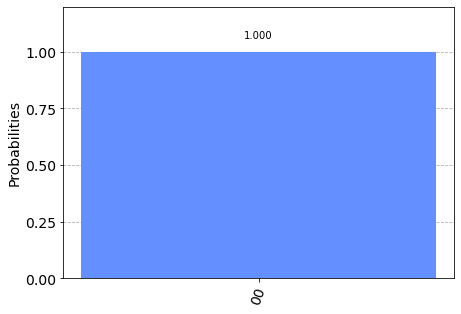

In [7]:
#USING SHARED-KEYS C0NSISTING OF LOG(N-BIT, 2) BELL STATES
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)

circuit.h(q[0])
circuit.cx(q[0],q[1])

#circuit.measure(q[0], c[0])
#circuit.measure(q[1], c[0])


#circuit.measure(q[0], c[0])
print(circuit.draw())

vector_sim = Aer.get_backend('statevector_simulator')
job = execute(circuit, vector_sim)
state = job.result().get_statevector()
print(state)


circuit.measure(q[0], c[0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
plot_histogram(result.get_counts(circuit))      #depending on the inputs, if input 1 and input 2 are the same, the output will be 0 with 100% probability. If the inputs differ, the outputs will differ too


In [8]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(math.pi/2**(n-qubit), qubit, n)
    
    
    #circuit.h(0)
    #circuit.cswap(n,n,n+2)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:



qc = QuantumCircuit(3)
q = QuantumRegister(3)
c = ClassicalRegister(3)

qft(qc,3)

#circuit.h(q[0])
qc.h(0)
qc.cswap(0,1,2)
qc.h(0)

qc.draw()

┌───┐   ┌───┐   ┌───┐
q_0: ──────■──────────────────────■───────┤ H ├─X─┤ H ├─■─┤ H ├
           │                ┌───┐ │P(π/2) └───┘ │ └───┘ │ └───┘
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────X──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       │      
q_2: ┤ H ├─■────────■───────────────────────────X───────X──────
     └───┘

In [14]:
qc = QuantumCircuit(3)
q = QuantumRegister(3)
c = ClassicalRegister(3)

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(math.pi/2**(n-qubit), qubit, n)
    
    
    #circuit.h(0)
    #circuit.cswap(n,n,n+2)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    qft_circ = qft(QuantumCircuit(n), n)
    invqft_circ = qft_circ.inverse()
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() 

#qc = inverse_qft(qc, nqubits)
#qc.measure_all()

qft(qc,3)
#qc+=QFT(num_qubits=3, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=True, name='qft1')
qc.h(0)
qc.cswap(0,1,2)
qc.h(0)


#qc+=QFT(num_qubits=3, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='qft1')

qft_circ = qft(QuantumCircuit(3), 3)
invqft_circ = qft_circ.inverse()
qc+=invqft_circ
qc.measure_all()
print(qc.draw())

                                             ┌───┐   ┌───┐   ┌───┐   ┌───┐»
   q_0: ──────■──────────────────────■───────┤ H ├─X─┤ H ├─■─┤ H ├─X─┤ H ├»
              │                ┌───┐ │P(π/2) └───┘ │ └───┘ │ └───┘ │ └───┘»
   q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────X───────┼──────»
        ┌───┐ │P(π/4)  │P(π/2) └───┘               │       │       │      »
   q_2: ┤ H ├─■────────■───────────────────────────X───────X───────X──────»
        └───┘                                                             »
meas: 3/══════════════════════════════════════════════════════════════════»
                                                                          »
«                                                 ░ ┌─┐      
«   q_0: ─■────────────────────────■──────────────░─┤M├──────
«         │P(-π/2) ┌───┐           │              ░ └╥┘┌─┐   
«   q_1: ─■────────┤ H ├─■─────────┼──────────────░──╫─┤M├───
«                  └───┘ │P(-π/2)  │P(-π/4) ┌───┐ ░  ║ └╥┘┌─┐
«   q_

C:\Users\AndréMSGrilo\AppData\Local\Temp\ipykernel_35032\554854367.py:51: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc+=invqft_circ
